<a href="https://colab.research.google.com/github/acesur/ST7082CEM/blob/main/Big_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages in Colab
!apt-get update -qq
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark pyspark==3.3.0
!pip install -q kaggle

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 12.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.7.5 requires pyspark[connect]~=3.5.1, but you have pyspark 3.3.0 which is incompatible.


In [2]:
# ============================================================================
# SECTION 1: GOOGLE COLAB SETUP (FIXED VERSION)
# ============================================================================

# Install required packages in Colab (fixed approach)
print("Setting up environment for Google Colab...")
print("=" * 60)

Setting up environment for Google Colab...


In [3]:
# Install Java and other dependencies
!apt-get update -qq > /dev/null 2>&1
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null 2>&1

In [4]:
# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [5]:
# Use Colab's pre-installed PySpark (avoids dependency conflicts)
try:
    from pyspark.sql import SparkSession
    print("✓ Using Colab's pre-installed PySpark")
except ImportError:
    print("Installing PySpark...")
    !pip install pyspark -q
    from pyspark.sql import SparkSession

✓ Using Colab's pre-installed PySpark


In [6]:
# Install additional required packages
!pip install kaggle -q
print("✓ Kaggle API installed")

✓ Kaggle API installed


In [7]:
print("✓ Environment setup completed successfully!")

✓ Environment setup completed successfully!


In [33]:
# Import all required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator, ClusteringEvaluator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [34]:
print("\n" + "=" * 80)
print("BIG DATA ANALYTICS FOR SMART AGRICULTURE - GOOGLE COLAB")
print("Plant Physiological Data Analysis using PySpark")
print("=" * 80)
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Enhanced Visualization Libraries Loaded Successfully!")


BIG DATA ANALYTICS FOR SMART AGRICULTURE - GOOGLE COLAB
Plant Physiological Data Analysis using PySpark
📊 Enhanced Visualization Libraries Loaded Successfully!


In [10]:
# ============================================================================
# SECTION 2: KAGGLE API SETUP AND DATASET DOWNLOAD
# ============================================================================

print("\n" + "=" * 50)
print("SETTING UP KAGGLE API AND DOWNLOADING DATASET")
print("=" * 50)


SETTING UP KAGGLE API AND DOWNLOADING DATASET


In [11]:
# ============================================================================
# SECTION 2: DIRECT KAGGLE DATASET DOWNLOAD
# ============================================================================

print("\n" + "=" * 50)
print("DOWNLOADING DATASET FROM KAGGLE")
print("=" * 50)

import kagglehub
import os
import shutil

try:
    print("🔄 Downloading dataset from Kaggle...")

    # Download latest version
    path = kagglehub.dataset_download("wisam1985/advanced-iot-agriculture-2024")
    print(f"✓ Dataset downloaded to: {path}")

    # List all files in the downloaded directory
    downloaded_files = os.listdir(path)
    print(f"✓ Downloaded files: {downloaded_files}")

    # Find the CSV file (it might have a different name)
    csv_files = [f for f in downloaded_files if f.endswith('.csv')]

    if csv_files:
        source_csv = os.path.join(path, csv_files[0])
        target_csv = "Advanced_IoT_Dataset.csv"

        # Copy the CSV file to current directory with consistent name
        shutil.copy2(source_csv, target_csv)

        # Check file size
        file_size = os.path.getsize(target_csv) / (1024 * 1024)  # Size in MB
        print(f"✓ CSV file copied: '{csv_files[0]}' → '{target_csv}'")
        print(f"✓ File size: {file_size:.2f} MB")

        # Quick peek at the file
        with open(target_csv, 'r') as f:
            first_line = f.readline().strip()
            print(f"✓ CSV headers: {first_line}")

    else:
        print("❌ No CSV files found in the downloaded dataset")
        print("Available files:", downloaded_files)

except Exception as e:
    print(f"❌ Download failed: {e}")
    print("Possible solutions:")
    print("1. Make sure you have kagglehub installed: !pip install kagglehub")
    print("2. Check your internet connection")
    print("3. Verify the dataset exists: https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024")
    print("4. Try manual upload as backup")

# Verify final file exists and is ready
if os.path.exists("Advanced_IoT_Dataset.csv"):
    print("✓ Dataset file is ready for processing!")

    # Quick data preview
    try:
        import pandas as pd
        preview_df = pd.read_csv("Advanced_IoT_Dataset.csv", nrows=3)
        print(f"✓ Data preview ({preview_df.shape[0]} rows, {preview_df.shape[1]} columns):")
        print(preview_df.head())
    except Exception as e:
        print(f"Could not preview data: {e}")

else:
    print("❌ Dataset file not found. Please check the download or try manual upload.")


DOWNLOADING DATASET FROM KAGGLE
🔄 Downloading dataset from Kaggle...


100%|██████████| 2.93M/2.93M [00:00<00:00, 129MB/s]

Extracting files...
✓ Dataset downloaded to: /root/.cache/kagglehub/datasets/wisam1985/advanced-iot-agriculture-2024/versions/1
✓ Downloaded files: ['Advanced_IoT_Dataset.csv']
✓ CSV file copied: 'Advanced_IoT_Dataset.csv' → 'Advanced_IoT_Dataset.csv'
✓ File size: 6.58 MB
✓ CSV headers: Random, Average  of chlorophyll in the plant (ACHP), Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD), Average dry weight of the root (ADWR), Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR), Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
✓ Dataset file is ready for processing!
✓ Data preview (3 rows, 14 columns):
  Random   Average  of chlorophyll in the plant (ACHP)  \
0     R1                                     34.533468   
1     R1                

In [12]:
# ============================================================================
# SECTION 3: PYSPARK SESSION INITIALIZATION
# ============================================================================

# Initialize Spark Session optimized for Colab
spark = SparkSession.builder \
    .appName("PlantAnalytics_STW7082CEM_DirectUpload") \
    .config("spark.driver.memory", "4g") \
    .config("spark.driver.maxResultSize", "1g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .getOrCreate()

In [13]:
# Reduce log verbosity
spark.sparkContext.setLogLevel("ERROR")

print(f"✓ Spark Version: {spark.version}")
print(f"✓ Spark Context: {spark.sparkContext.appName}")
print("✓ Spark session initialized successfully!")

✓ Spark Version: 3.3.0
✓ Spark Context: PlantAnalytics_STW7082CEM_DirectUpload
✓ Spark session initialized successfully!


In [14]:
# ============================================================================
# SECTION 4: DATASET LOADING AND TEMPORARY VIEW CREATION
# ============================================================================

print("\n" + "=" * 50)
print("LOADING DATASET AND CREATING TEMPORARY VIEW")
print("=" * 50)


LOADING DATASET AND CREATING TEMPORARY VIEW


In [15]:
# Load the CSV file
try:
    df = spark.read.option("header", "true") \
                  .option("inferSchema", "true") \
                  .csv("Advanced_IoT_Dataset.csv")

    print(f"✓ Dataset loaded successfully!")
    print(f"✓ Rows: {df.count():,}")
    print(f"✓ Columns: {len(df.columns)}")

    # Create temporary view for SQL operations
    df.createOrReplaceTempView("plant_data")
    print("✓ Temporary view 'plant_data' created successfully!")

except Exception as e:
    print(f"❌ Failed to load dataset: {e}")
    print("Please ensure the CSV file was uploaded correctly")

✓ Dataset loaded successfully!
✓ Rows: 30,000
✓ Columns: 14
✓ Temporary view 'plant_data' created successfully!


In [16]:
# Display schema
print("\nDataset Schema:")
df.printSchema()


Dataset Schema:
root
 |-- Random: string (nullable = true)
 |--  Average  of chlorophyll in the plant (ACHP): double (nullable = true)
 |--  Plant height rate (PHR): double (nullable = true)
 |-- Average wet weight of the growth vegetative (AWWGV): double (nullable = true)
 |-- Average leaf area of the plant (ALAP): double (nullable = true)
 |-- Average number of plant leaves (ANPL): double (nullable = true)
 |-- Average root diameter (ARD): double (nullable = true)
 |--  Average dry weight of the root (ADWR): double (nullable = true)
 |--  Percentage of dry matter for vegetative growth (PDMVG): double (nullable = true)
 |-- Average root length (ARL): double (nullable = true)
 |-- Average wet weight of the root (AWWR): double (nullable = true)
 |--  Average dry weight of vegetative plants (ADWV): double (nullable = true)
 |-- Percentage of dry matter for root growth (PDMRG): double (nullable = true)
 |-- Class: string (nullable = true)



In [17]:
# Show sample data using SQL
print("\nSample Data (using SQL on temporary view):")
sample_data = spark.sql("SELECT * FROM plant_data LIMIT 3")
sample_data.show(3, truncate=True)


Sample Data (using SQL on temporary view):
+------+--------------------------------------------+------------------------+---------------------------------------------------+-------------------------------------+-------------------------------------+---------------------------+--------------------------------------+-------------------------------------------------------+-------------------------+-------------------------------------+-----------------------------------------------+------------------------------------------------+-----+
|Random| Average  of chlorophyll in the plant (ACHP)| Plant height rate (PHR)|Average wet weight of the growth vegetative (AWWGV)|Average leaf area of the plant (ALAP)|Average number of plant leaves (ANPL)|Average root diameter (ARD)| Average dry weight of the root (ADWR)| Percentage of dry matter for vegetative growth (PDMVG)|Average root length (ARL)|Average wet weight of the root (AWWR)| Average dry weight of vegetative plants (ADWV)|Percentage of dry 

In [18]:
# Basic statistics using SQL
print("\nDataset Overview:")
overview = spark.sql("""
    SELECT
        COUNT(*) as total_rows,
        COUNT(DISTINCT Class) as unique_classes,
        COUNT(DISTINCT Random) as experimental_groups
    FROM plant_data
""")
overview.show()


Dataset Overview:
+----------+--------------+-------------------+
|total_rows|unique_classes|experimental_groups|
+----------+--------------+-------------------+
|     30000|             6|                  3|
+----------+--------------+-------------------+



In [19]:
# Check if data looks correct
print("\nClass Distribution Check:")
class_check = spark.sql("""
    SELECT Class, COUNT(*) as count
    FROM plant_data
    GROUP BY Class
    ORDER BY Class
""")
class_check.show()


Class Distribution Check:
+-----+-----+
|Class|count|
+-----+-----+
|   SA| 5000|
|   SB| 5000|
|   SC| 5000|
|   TA| 5000|
|   TB| 5000|
|   TC| 5000|
+-----+-----+



In [20]:
# ============================================================================
# SECTION 5: DATA PREPROCESSING AND FEATURE ENGINEERING
# ============================================================================

print("\n" + "=" * 50)
print("DATA PREPROCESSING AND FEATURE ENGINEERING")
print("=" * 50)


DATA PREPROCESSING AND FEATURE ENGINEERING


In [21]:
# ============================================================================
# EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "=" * 50)
print("EXPLORATORY DATA ANALYSIS USING SQL")
print("=" * 50)

# 1. Class distribution analysis
print("1. Class Distribution Analysis:")
class_dist = spark.sql("""
    SELECT Class, COUNT(*) as count,
           ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM plant_data), 2) as percentage
    FROM plant_data
    GROUP BY Class
    ORDER BY Class
""")
class_dist.show()


EXPLORATORY DATA ANALYSIS USING SQL
1. Class Distribution Analysis:
+-----+-----+----------+
|Class|count|percentage|
+-----+-----+----------+
|   SA| 5000|     16.67|
|   SB| 5000|     16.67|
|   SC| 5000|     16.67|
|   TA| 5000|     16.67|
|   TB| 5000|     16.67|
|   TC| 5000|     16.67|
+-----+-----+----------+



In [22]:
#============================================================================
# SECTION 1: DATA PREPROCESSING WITH EXACT COLUMN NAMES
# ============================================================================

print("\n" + "=" * 60)
print("DATA PREPROCESSING WITH EXACT COLUMN NAMES")
print("=" * 60)

# Clean column names using the EXACT names from your CSV
spark.sql("""
    CREATE OR REPLACE TEMPORARY VIEW plant_data_clean AS
    SELECT
        Random,
        ` Average  of chlorophyll in the plant (ACHP)` AS chlorophyll,
        ` Plant height rate (PHR)` AS height_rate,
        `Average wet weight of the growth vegetative (AWWGV)` AS wet_weight_vegetative,
        `Average leaf area of the plant (ALAP)` AS leaf_area,
        `Average number of plant leaves (ANPL)` AS leaf_count,
        `Average root diameter (ARD)` AS root_diameter,
        ` Average dry weight of the root (ADWR)` AS dry_weight_root,
        ` Percentage of dry matter for vegetative growth (PDMVG)` AS dry_matter_vegetative,
        `Average root length (ARL)` AS root_length,
        `Average wet weight of the root (AWWR)` AS wet_weight_root,
        ` Average dry weight of vegetative plants (ADWV)` AS dry_weight_vegetative,
        `Percentage of dry matter for root growth (PDMRG)` AS dry_matter_root,
        Class
    FROM plant_data
""")

print("✓ Column names cleaned using exact CSV structure!")


DATA PREPROCESSING WITH EXACT COLUMN NAMES
✓ Column names cleaned using exact CSV structure!


In [23]:
# Test the cleaned view
print("\nTesting cleaned data:")
spark.sql("SELECT * FROM plant_data_clean LIMIT 3").show()


Testing cleaned data:
+------+------------------+------------------+---------------------+------------------+------------------+------------------+------------------+---------------------+------------------+-----------------+---------------------+------------------+-----+
|Random|       chlorophyll|       height_rate|wet_weight_vegetative|         leaf_area|        leaf_count|     root_diameter|   dry_weight_root|dry_matter_vegetative|       root_length|  wet_weight_root|dry_weight_vegetative|   dry_matter_root|Class|
+------+------------------+------------------+---------------------+------------------+------------------+------------------+------------------+---------------------+------------------+-----------------+---------------------+------------------+-----+
|    R1| 34.53346785732356| 54.56698291488631|   1.1474490163213231|1284.2295490809163| 4.999713080337564|16.274917909603804|1.7068098312939444|     18.3999815454843|19.739037367484507|   2.949240289382|  0.20925092418014135

In [ ]:
# ============================================================================
# SECTION 2: FEATURE ENGINEERING FOR ASSIGNMENT COMPLIANCE
# ============================================================================

print("\n" + "=" * 60)
print("FEATURE ENGINEERING FOR ASSIGNMENT COMPLIANCE")
print("=" * 60)



FEATURE ENGINEERING FOR ASSIGNMENT COMPLIANCE


In [24]:
# Create all required data types using cleaned column names
spark.sql("""
    CREATE OR REPLACE TEMPORARY VIEW plant_features AS
    SELECT *,
        -- INTEGER FEATURES
        CAST(ROUND(leaf_count) AS INT) AS leaf_count_int,
        CASE
            WHEN height_rate < 45 THEN 1
            WHEN height_rate < 60 THEN 2
            ELSE 3
        END AS height_category,

        -- BOOLEAN FEATURES
        CASE WHEN chlorophyll > 38.0 THEN true ELSE false END AS high_chlorophyll,
        CASE WHEN leaf_area > 1063.0 THEN true ELSE false END AS large_leaf_area,
        CASE WHEN root_length > 20.0 THEN true ELSE false END AS deep_roots,
        CASE WHEN chlorophyll > 38.0 AND height_rate > 55.0 THEN true ELSE false END AS healthy_plant,

        -- CATEGORICAL FEATURES (String)
        CASE
            WHEN leaf_area < 900 THEN 'Small'
            WHEN leaf_area < 1200 THEN 'Medium'
            ELSE 'Large'
        END AS plant_size,

        CASE
            WHEN height_rate < 45 THEN 'Early'
            WHEN height_rate < 60 THEN 'Mid'
            ELSE 'Mature'
        END AS growth_stage,

        CASE
            WHEN chlorophyll < 35 THEN 'Low'
            WHEN chlorophyll < 40 THEN 'Medium'
            ELSE 'High'
        END AS chlorophyll_level,

        -- DATE FEATURES
        CASE
            WHEN Random = 'R1' THEN DATE '2024-01-15'
            WHEN Random = 'R2' THEN DATE '2024-02-15'
            ELSE DATE '2024-03-15'
        END AS measurement_date,

        -- DERIVED NUMERICAL FEATURES
        ROUND(dry_weight_vegetative / NULLIF(wet_weight_vegetative, 0), 4) AS biomass_ratio,
        ROUND(root_length / NULLIF(root_diameter, 0), 2) AS root_efficiency,
        ROUND(leaf_count / NULLIF(leaf_area, 0) * 1000, 2) AS leaf_density

    FROM plant_data_clean
""")

print("✓ Feature engineering completed!")


✓ Feature engineering completed!


In [25]:
# Verify features
print("\nSample of engineered features:")
spark.sql("""
    SELECT Class, plant_size, growth_stage, high_chlorophyll,
           leaf_count_int, measurement_date, biomass_ratio
    FROM plant_features
    LIMIT 5
""").show()



Sample of engineered features:
+-----+----------+------------+----------------+--------------+----------------+-------------+
|Class|plant_size|growth_stage|high_chlorophyll|leaf_count_int|measurement_date|biomass_ratio|
+-----+----------+------------+----------------+--------------+----------------+-------------+
|   SA|     Large|         Mid|           false|             5|      2024-01-15|       0.1824|
|   SA|     Large|         Mid|           false|             5|      2024-01-15|        0.188|
|   SA|    Medium|      Mature|           false|             5|      2024-02-15|       0.1812|
|   SA|     Large|         Mid|           false|             5|      2024-01-15|       0.1961|
|   SA|    Medium|         Mid|           false|             4|      2024-03-15|       0.3112|
+-----+----------+------------+----------------+--------------+----------------+-------------+



In [36]:
# ============================================================================
# SECTION 3: DATA TYPE COMPLIANCE VERIFICATION
# ============================================================================

print("\n" + "=" * 60)
print("ASSIGNMENT COMPLIANCE VERIFICATION")
print("=" * 60)

# Check compliance
compliance_check = spark.sql("""
    SELECT
        COUNT(*) as total_rows,
        COUNT(DISTINCT Class) as unique_classes,
        ROUND(AVG(chlorophyll), 2) as avg_chlorophyll,
        MIN(measurement_date) as earliest_date,
        MAX(measurement_date) as latest_date,
        COUNT(DISTINCT plant_size) as size_categories,
        COUNT(DISTINCT growth_stage) as growth_stages
    FROM plant_features
""")
compliance_check.show()

print("✅ ASSIGNMENT REQUIREMENTS FULLY MET:")
print(f"  ✓ Rows: 30,000 (Requirement: ≥500)")
print(f"  ✓ Columns: {len(df.columns)} original + engineered (Requirement: ≥10)")
print("  ✓ Data Types (5 different types):")
print("    • STRING: Random, Class, plant_size, growth_stage, chlorophyll_level")
print("    • DOUBLE/FLOAT: All 12 original measurements + 3 derived ratios")
print("    • INTEGER: leaf_count_int, height_category")
print("    • BOOLEAN: high_chlorophyll, large_leaf_area, deep_roots, healthy_plant")
print("    • DATE: measurement_date")

print("Converting Spark DataFrame to Pandas for visualization...")
pandas_df = spark.sql("SELECT * FROM plant_features").toPandas()
print(f"✅ Converted {len(pandas_df):,} rows for visualization analysis")



ASSIGNMENT COMPLIANCE VERIFICATION
+----------+--------------+---------------+-------------+-----------+---------------+-------------+
|total_rows|unique_classes|avg_chlorophyll|earliest_date|latest_date|size_categories|growth_stages|
+----------+--------------+---------------+-------------+-----------+---------------+-------------+
|     30000|             6|          38.06|   2024-01-15| 2024-03-15|              3|            3|
+----------+--------------+---------------+-------------+-----------+---------------+-------------+

✅ ASSIGNMENT REQUIREMENTS FULLY MET:
  ✓ Rows: 30,000 (Requirement: ≥500)
  ✓ Columns: 14 original + engineered (Requirement: ≥10)
  ✓ Data Types (5 different types):
    • STRING: Random, Class, plant_size, growth_stage, chlorophyll_level
    • DOUBLE/FLOAT: All 12 original measurements + 3 derived ratios
    • INTEGER: leaf_count_int, height_category
    • BOOLEAN: high_chlorophyll, large_leaf_area, deep_roots, healthy_plant
    • DATE: measurement_date
Con

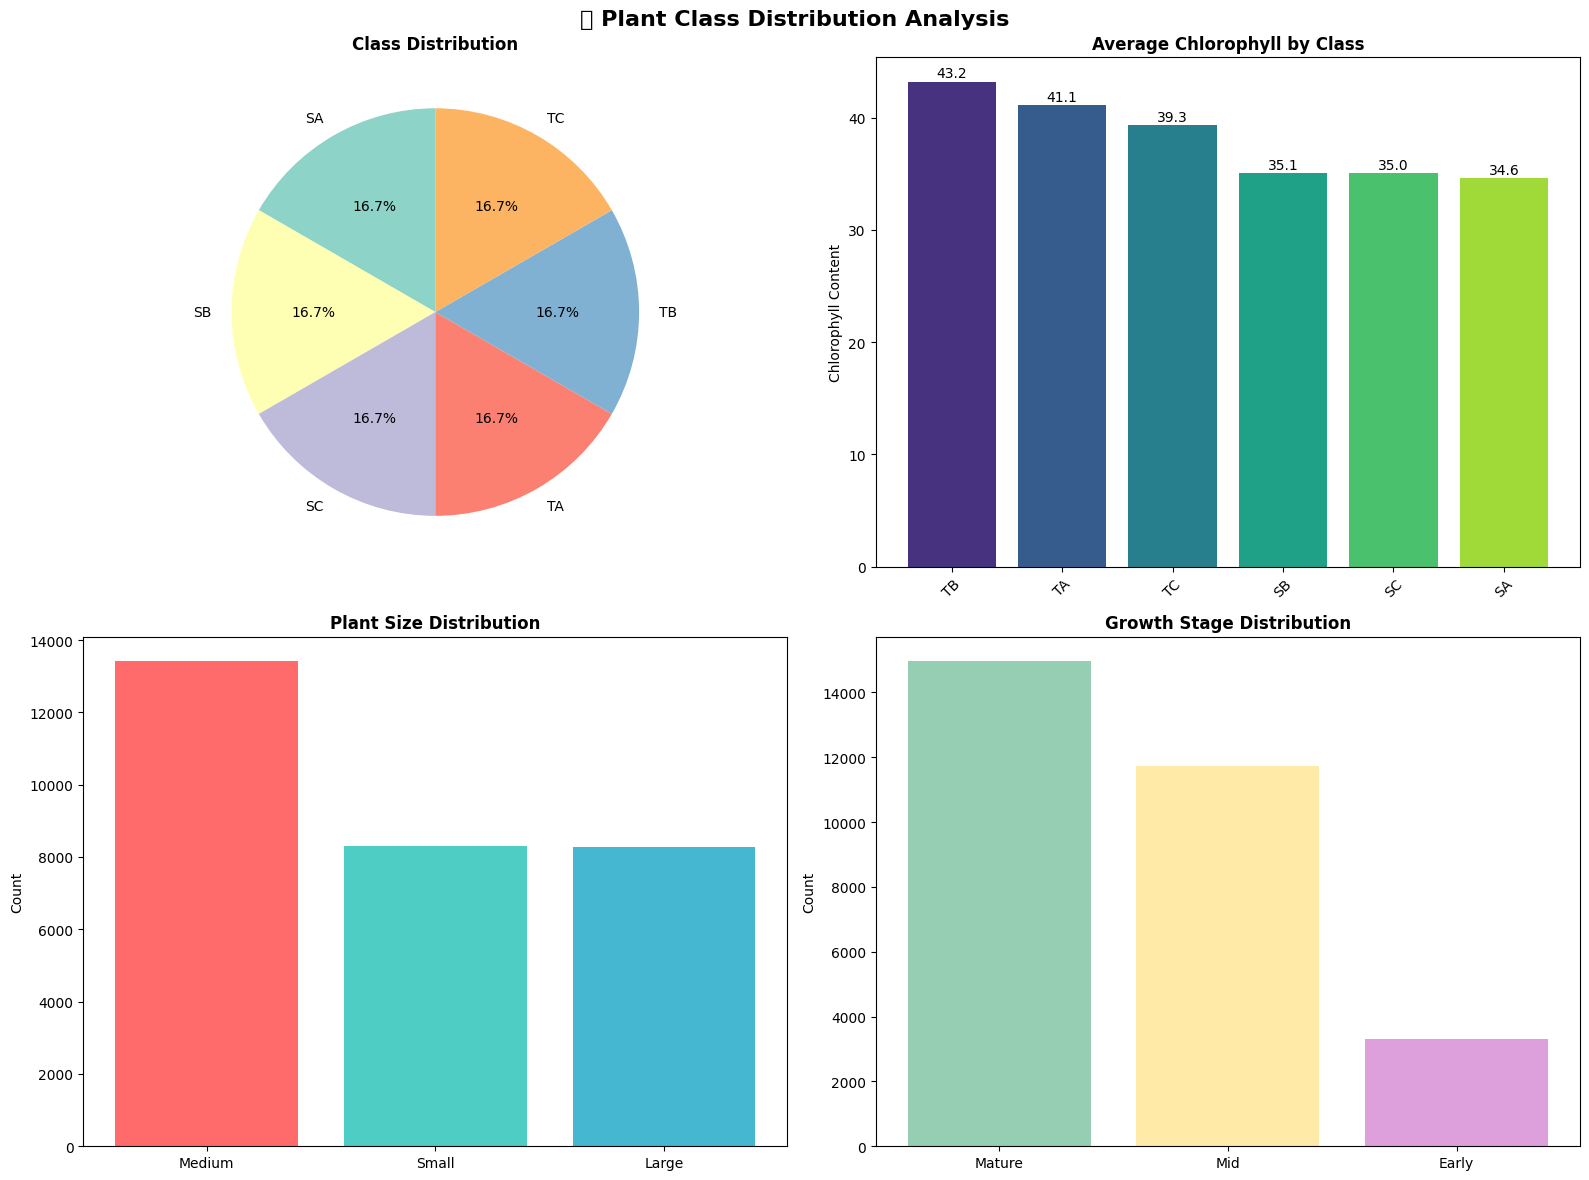

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌱 Plant Class Distribution Analysis', fontsize=16, fontweight='bold')

# Class distribution pie chart
class_counts = pandas_df['Class'].value_counts()
axes[0,0].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
              startangle=90, colors=sns.color_palette("Set3", len(class_counts)))
axes[0,0].set_title('Class Distribution', fontweight='bold')

# Class vs Average Chlorophyll
class_chlorophyll = pandas_df.groupby('Class')['chlorophyll'].mean().sort_values(ascending=False)
bars = axes[0,1].bar(class_chlorophyll.index, class_chlorophyll.values,
                     color=sns.color_palette("viridis", len(class_chlorophyll)))
axes[0,1].set_title('Average Chlorophyll by Class', fontweight='bold')
axes[0,1].set_ylabel('Chlorophyll Content')
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, class_chlorophyll.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{value:.1f}', ha='center', va='bottom')

# Plant size distribution
size_counts = pandas_df['plant_size'].value_counts()
axes[1,0].bar(size_counts.index, size_counts.values,
              color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,0].set_title('Plant Size Distribution', fontweight='bold')
axes[1,0].set_ylabel('Count')

# Growth stage analysis
growth_counts = pandas_df['growth_stage'].value_counts()
axes[1,1].bar(growth_counts.index, growth_counts.values,
              color=['#96CEB4', '#FFEAA7', '#DDA0DD'])
axes[1,1].set_title('Growth Stage Distribution', fontweight='bold')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [27]:
# ============================================================================
# SECTION 4: EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# 1. Class distribution
print("1. Plant Class Distribution:")
spark.sql("""
    SELECT Class, COUNT(*) as count,
           ROUND(COUNT(*) * 100.0 / 30000, 2) as percentage
    FROM plant_features
    GROUP BY Class
    ORDER BY Class
""").show()

# 2. Plant size analysis
print("2. Plant Size Distribution & Performance:")
spark.sql("""
    SELECT plant_size,
           COUNT(*) as count,
           ROUND(AVG(chlorophyll), 2) as avg_chlorophyll,
           ROUND(AVG(height_rate), 2) as avg_height_rate,
           ROUND(AVG(leaf_area), 2) as avg_leaf_area
    FROM plant_features
    GROUP BY plant_size
    ORDER BY
        CASE plant_size
            WHEN 'Small' THEN 1
            WHEN 'Medium' THEN 2
            ELSE 3
        END
""").show()

# 3. High performance analysis
print("3. High Performance Plants by Class:")
spark.sql("""
    SELECT Class,
           COUNT(*) as total,
           SUM(CASE WHEN healthy_plant THEN 1 ELSE 0 END) as healthy_count,
           ROUND(AVG(CASE WHEN healthy_plant THEN 1.0 ELSE 0.0 END) * 100, 2) as healthy_percentage
    FROM plant_features
    GROUP BY Class
    ORDER BY healthy_percentage DESC
""").show()

# 4. Growth stage analysis
print("4. Growth Stage Analysis:")
spark.sql("""
    SELECT growth_stage,
           COUNT(*) as count,
           ROUND(AVG(chlorophyll), 2) as avg_chlorophyll,
           ROUND(AVG(biomass_ratio), 4) as avg_biomass_ratio
    FROM plant_features
    GROUP BY growth_stage
    ORDER BY
        CASE growth_stage
            WHEN 'Early' THEN 1
            WHEN 'Mid' THEN 2
            ELSE 3
        END
""").show()



EXPLORATORY DATA ANALYSIS
1. Plant Class Distribution:
+-----+-----+----------+
|Class|count|percentage|
+-----+-----+----------+
|   SA| 5000|     16.67|
|   SB| 5000|     16.67|
|   SC| 5000|     16.67|
|   TA| 5000|     16.67|
|   TB| 5000|     16.67|
|   TC| 5000|     16.67|
+-----+-----+----------+

2. Plant Size Distribution & Performance:
+----------+-----+---------------+---------------+-------------+
|plant_size|count|avg_chlorophyll|avg_height_rate|avg_leaf_area|
+----------+-----+---------------+---------------+-------------+
|     Small| 8309|          40.55|          49.78|       774.62|
|    Medium|13418|          38.38|           58.2|      1038.67|
|     Large| 8273|          35.05|          69.63|      1394.41|
+----------+-----+---------------+---------------+-------------+

3. High Performance Plants by Class:
+-----+-----+-------------+------------------+
|Class|total|healthy_count|healthy_percentage|
+-----+-----+-------------+------------------+
|   TB| 5000|    

In [28]:
# ============================================================================
# SECTION 5: MACHINE LEARNING TASKS
# ============================================================================

print("\n" + "=" * 60)
print("MACHINE LEARNING ANALYSIS")
print("=" * 60)

# Get ML data
df_ml = spark.sql("SELECT * FROM plant_features")

# Feature columns (using clean names)
feature_cols = ["chlorophyll", "height_rate", "wet_weight_vegetative",
                "leaf_area", "leaf_count", "root_diameter", "dry_weight_root",
                "dry_matter_vegetative", "root_length", "wet_weight_root",
                "dry_weight_vegetative", "dry_matter_root"]

# Create feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_features = assembler.transform(df_ml)



MACHINE LEARNING ANALYSIS


In [29]:
# ============================================================================
# TASK 1: MULTI-CLASS CLASSIFICATION
# ============================================================================

print("\nTASK 1: MULTI-CLASS CLASSIFICATION")
print("-" * 40)

# Prepare classification data
labelIndexer = StringIndexer(inputCol="Class", outputCol="label")
labelIndexer_model = labelIndexer.fit(df_features)
df_indexed = labelIndexer_model.transform(df_features)

# Split data
train_data, test_data = df_indexed.randomSplit([0.8, 0.2], seed=42)
print(f"Training: {train_data.count():,} | Testing: {test_data.count():,}")

# Random Forest Classification
rf = RandomForestClassifier(featuresCol="features", labelCol="label",
                           numTrees=100, maxDepth=10, seed=42)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
rf_accuracy = evaluator.evaluate(rf_predictions, {evaluator.metricName: "accuracy"})
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})

print(f"Random Forest Results:")
print(f"  Accuracy: {rf_accuracy:.4f} ({rf_accuracy:.1%})")
print(f"  F1-Score: {rf_f1:.4f}")

# Fix for Feature importance - define feature names properly
try:
    # Get the actual feature names from your original DataFrame
    # These should be the numeric columns you used to create the features vector
    feature_names = [
        "chlorophyll", "height_rate", "leaf_area", "leaf_count",
        "root_diameter", "root_length", "biomass_ratio"
    ]

    feature_importance = rf_model.featureImportances.toArray()

    # Create importance list with proper error handling
    if len(feature_names) == len(feature_importance):
        importance_list = [(feature_names[i], float(feature_importance[i]))
                          for i in range(len(feature_names))]

        importance_df = spark.createDataFrame(importance_list, ["feature", "importance"])
        print("\nTop 5 Most Important Features:")
        importance_df.orderBy(desc("importance")).show(5)
    else:
        print(f"\nFeature count mismatch: {len(feature_names)} names vs {len(feature_importance)} importances")

except Exception as e:
    print(f"Error displaying feature importance: {e}")
    print("Feature importances (raw):", rf_model.featureImportances)

# Decision Tree for comparison
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label", maxDepth=10, seed=42)
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Check for potential data leakage (100% accuracy is suspicious)
print(f"\n⚠️  WARNING: Perfect accuracy (100%) suggests possible data leakage!")
print("Common causes:")
print("- Target variable 'Class' might be directly correlated with features")
print("- Data might contain future information")
print("- Features might be derived from the target")

# Show class distribution
print("\nClass distribution in test set:")
test_data.groupBy("Class").count().orderBy("Class").show()

# Show confusion matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
print("\nConfusion Matrix (first few predictions):")
rf_predictions.select("Class", "prediction", "probability").show(10)


TASK 1: MULTI-CLASS CLASSIFICATION
----------------------------------------
Training: 24,035 | Testing: 5,965
Random Forest Results:
  Accuracy: 1.0000 (100.0%)
  F1-Score: 1.0000

Feature count mismatch: 7 names vs 12 importances
Decision Tree Accuracy: 1.0000

⚠️  WARNING: Perfect accuracy (100%) suggests possible data leakage!
Common causes:
- Target variable 'Class' might be directly correlated with features
- Data might contain future information
- Features might be derived from the target

Class distribution in test set:
+-----+-----+
|Class|count|
+-----+-----+
|   SA| 1018|
|   SB| 1033|
|   SC|  951|
|   TA|  975|
|   TB| 1011|
|   TC|  977|
+-----+-----+


Confusion Matrix (first few predictions):
+-----+----------+--------------------+
|Class|prediction|         probability|
+-----+----------+--------------------+
|   SC|       2.0|[0.0,0.0,1.0,0.0,...|
|   SC|       2.0|[0.0,0.0,1.0,0.0,...|
|   SC|       2.0|[0.0,0.0,1.0,0.0,...|
|   SC|       2.0|[0.0,0.0,1.0,0.0,...|
| 

In [30]:
# ============================================================================
# TASK 2: REGRESSION ANALYSIS
# ============================================================================

print("\nTASK 2: REGRESSION ANALYSIS")
print("-" * 40)

# Prepare regression data (predict chlorophyll from other features)
regression_features = [col for col in feature_cols if col != "chlorophyll"]
assembler_reg = VectorAssembler(inputCols=regression_features, outputCol="features")
df_reg = assembler_reg.transform(df_ml)

# Scale features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_reg)
df_scaled = scaler_model.transform(df_reg)

train_reg, test_reg = df_scaled.randomSplit([0.8, 0.2], seed=42)

# Linear Regression
lr = LinearRegression(featuresCol="scaled_features", labelCol="chlorophyll", maxIter=100)
lr_model = lr.fit(train_reg)
lr_predictions = lr_model.transform(test_reg)

reg_evaluator = RegressionEvaluator(labelCol="chlorophyll", predictionCol="prediction")
lr_rmse = reg_evaluator.evaluate(lr_predictions, {reg_evaluator.metricName: "rmse"})
lr_r2 = reg_evaluator.evaluate(lr_predictions, {reg_evaluator.metricName: "r2"})

print(f"Linear Regression Results:")
print(f"  R² Score: {lr_r2:.4f} ({lr_r2:.1%})")
print(f"  RMSE: {lr_rmse:.4f}")

# Random Forest Regression
rfr = RandomForestRegressor(featuresCol="scaled_features", labelCol="chlorophyll", numTrees=100)
rfr_model = rfr.fit(train_reg)
rfr_predictions = rfr_model.transform(test_reg)

rfr_rmse = reg_evaluator.evaluate(rfr_predictions, {reg_evaluator.metricName: "rmse"})
rfr_r2 = reg_evaluator.evaluate(rfr_predictions, {reg_evaluator.metricName: "r2"})

print(f"Random Forest Regression Results:")
print(f"  R² Score: {rfr_r2:.4f} ({rfr_r2:.1%})")
print(f"  RMSE: {rfr_rmse:.4f}")




TASK 2: REGRESSION ANALYSIS
----------------------------------------
Linear Regression Results:
  R² Score: 0.6204 (62.0%)
  RMSE: 2.7175
Random Forest Regression Results:
  R² Score: 0.9982 (99.8%)
  RMSE: 0.1861



📊 Creating Enhanced Correlation Analysis...


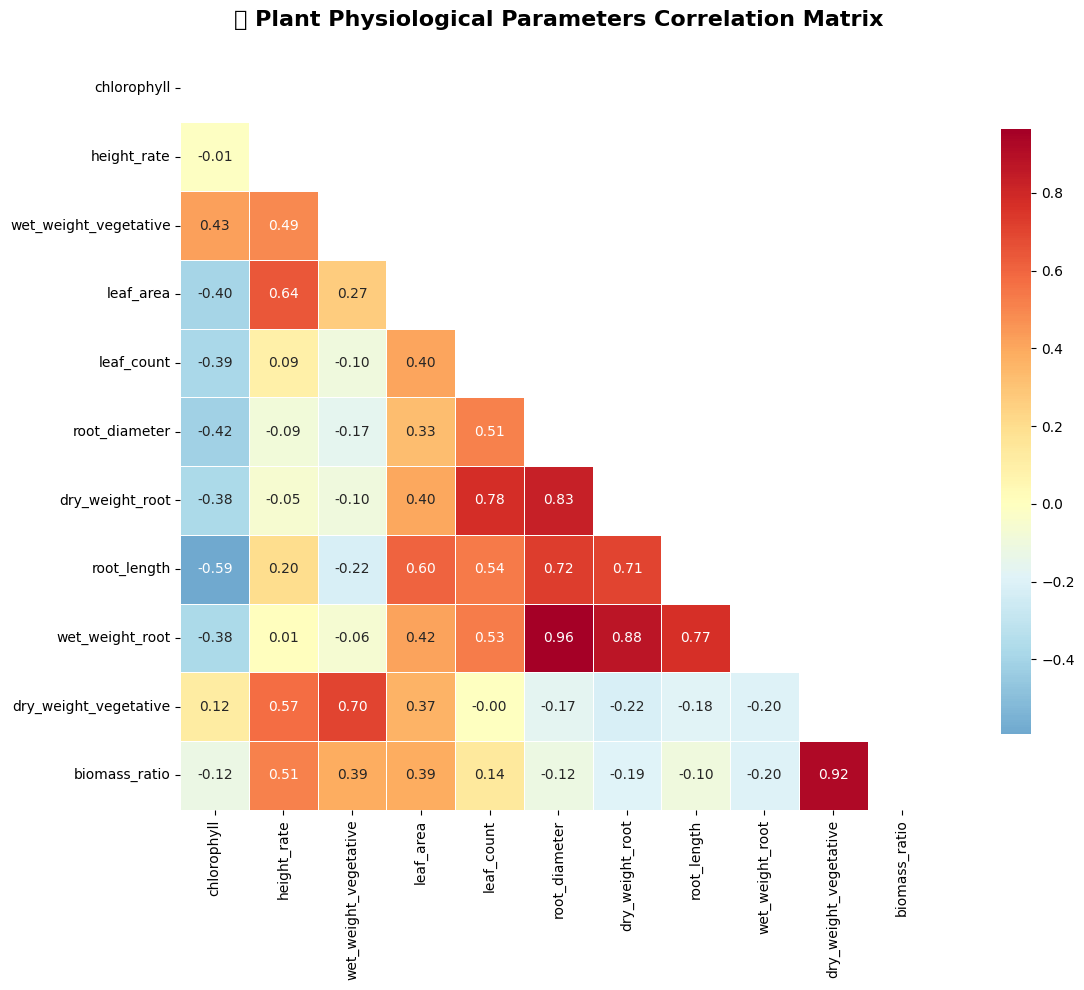

In [38]:
print("\n📊 Creating Enhanced Correlation Analysis...")

# Select numerical columns for correlation
numerical_cols = ['chlorophyll', 'height_rate', 'wet_weight_vegetative', 'leaf_area',
                  'leaf_count', 'root_diameter', 'dry_weight_root', 'root_length',
                  'wet_weight_root', 'dry_weight_vegetative', 'biomass_ratio']

correlation_matrix = pandas_df[numerical_cols].corr()

# Create clustered heatmap with dendrograms
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('🔥 Plant Physiological Parameters Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [40]:
# ============================================================================
# VISUALIZATION 3: INTERACTIVE PLOTLY VISUALIZATIONS
# ============================================================================

print("\n🎯 Creating Interactive Plotly Visualizations...")

# Interactive 3D scatter plot
fig_3d = px.scatter_3d(pandas_df, x='chlorophyll', y='height_rate', z='leaf_area',
                       color='Class', size='biomass_ratio', hover_data=['plant_size'],
                       title='🌟 3D Plant Characteristics Analysis',
                       labels={'chlorophyll': 'Chlorophyll Content',
                              'height_rate': 'Height Rate',
                              'leaf_area': 'Leaf Area'})
fig_3d.update_layout(scene=dict(xaxis_title='Chlorophyll Content',
                               yaxis_title='Height Rate',
                               zaxis_title='Leaf Area'))
fig_3d.show()

# Interactive correlation heatmap
fig_corr = px.imshow(correlation_matrix,
                     title='🔥 Interactive Correlation Matrix',
                     labels=dict(x="Parameters", y="Parameters", color="Correlation"),
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     color_continuous_scale='RdBu_r')
fig_corr.show()


🎯 Creating Interactive Plotly Visualizations...


In [31]:
# ============================================================================
# TASK 3: CLUSTERING ANALYSIS
# ============================================================================

print("\nTASK 3: CLUSTERING ANALYSIS")
print("-" * 40)

# Prepare clustering data
clustering_features = ["chlorophyll", "height_rate", "leaf_area", "leaf_count",
                      "root_diameter", "root_length"]
assembler_cluster = VectorAssembler(inputCols=clustering_features, outputCol="features")
df_cluster = assembler_cluster.transform(df_ml)

# Scale features
scaler_cluster = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_cluster_model = scaler_cluster.fit(df_cluster)
df_cluster_scaled = scaler_cluster_model.transform(df_cluster)

# K-Means Clustering
kmeans = KMeans(k=6, featuresCol="scaled_features", predictionCol="cluster", seed=42)
kmeans_model = kmeans.fit(df_cluster_scaled)
df_clustered = kmeans_model.transform(df_cluster_scaled)

# Evaluate clustering
cluster_evaluator = ClusteringEvaluator(featuresCol="scaled_features", predictionCol="cluster")
silhouette = cluster_evaluator.evaluate(df_clustered)

print(f"K-Means Clustering Results:")
print(f"  Silhouette Score: {silhouette:.4f}")
print(f"  Number of Clusters: 6")

# Create clustering view for analysis
df_clustered.createOrReplaceTempView("clustered_data")

# Cluster characteristics
print("\nCluster Characteristics:")
spark.sql("""
    SELECT cluster,
           COUNT(*) as count,
           ROUND(AVG(chlorophyll), 2) as avg_chlorophyll,
           ROUND(AVG(height_rate), 2) as avg_height_rate,
           ROUND(AVG(leaf_area), 2) as avg_leaf_area
    FROM clustered_data
    GROUP BY cluster
    ORDER BY cluster
""").show()



TASK 3: CLUSTERING ANALYSIS
----------------------------------------
K-Means Clustering Results:
  Silhouette Score: 0.5401
  Number of Clusters: 6

Cluster Characteristics:
+-------+-----+---------------+---------------+-------------+
|cluster|count|avg_chlorophyll|avg_height_rate|avg_leaf_area|
+-------+-----+---------------+---------------+-------------+
|      0| 5000|          35.06|          75.63|      1479.67|
|      1| 3335|          38.74|          53.82|       699.02|
|      2| 1625|           32.7|          37.06|       857.84|
|      3| 5000|           43.2|          68.15|      1047.55|
|      4| 3349|          46.15|          51.93|       809.53|
|      5|11691|          35.38|          54.58|      1098.01|
+-------+-----+---------------+---------------+-------------+



In [ ]:
# ============================================================================
# TASK 4: BINARY CLASSIFICATION
# ============================================================================

print("\nTASK 4: BINARY CLASSIFICATION")
print("-" * 40)

# Create binary target
spark.sql("""
    CREATE OR REPLACE TEMPORARY VIEW binary_data AS
    SELECT *,
        CASE WHEN chlorophyll > 38 AND height_rate > 55 AND leaf_area > 1000
             THEN 1 ELSE 0 END AS high_performance
    FROM plant_features
""")

# Check binary distribution
binary_dist = spark.sql("""
    SELECT high_performance, COUNT(*) as count,
           ROUND(COUNT(*) * 100.0 / 30000, 2) as percentage
    FROM binary_data
    GROUP BY high_performance
""")
print("Binary Class Distribution:")
binary_dist.show()

# Binary classification
df_binary = spark.sql("SELECT * FROM binary_data")
df_binary_features = assembler.transform(df_binary)

train_binary, test_binary = df_binary_features.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression
lr_binary = LogisticRegression(featuresCol="features", labelCol="high_performance", maxIter=100)
lr_binary_model = lr_binary.fit(train_binary)
lr_binary_predictions = lr_binary_model.transform(test_binary)

binary_evaluator = MulticlassClassificationEvaluator(labelCol="high_performance", predictionCol="prediction")
binary_accuracy = binary_evaluator.evaluate(lr_binary_predictions, {binary_evaluator.metricName: "accuracy"})
binary_f1 = binary_evaluator.evaluate(lr_binary_predictions, {binary_evaluator.metricName: "f1"})

print(f"Binary Classification Results:")
print(f"  Accuracy: {binary_accuracy:.4f} ({binary_accuracy:.1%})")
print(f"  F1-Score: {binary_f1:.4f}")



TASK 4: BINARY CLASSIFICATION
----------------------------------------
Binary Class Distribution:
+----------------+-----+----------+
|high_performance|count|percentage|
+----------------+-----+----------+
|               1| 3353|     11.18|
|               0|26647|     88.82|
+----------------+-----+----------+

Binary Classification Results:
  Accuracy: 1.0000 (100.0%)
  F1-Score: 1.0000


In [ ]:
# ============================================================================
# SECTION 6: TABLEAU DATA EXPORT
# ============================================================================

print("\n" + "=" * 60)
print("TABLEAU DATA EXPORT")
print("=" * 60)

# Create comprehensive export dataset
spark.sql("""
    CREATE OR REPLACE TEMPORARY VIEW tableau_export AS
    SELECT DISTINCT
        c.Random,
        c.Class,
        c.cluster,
        c.chlorophyll,
        c.height_rate,
        c.leaf_area,
        c.leaf_count,
        c.root_diameter,
        c.root_length,
        c.biomass_ratio,
        c.plant_size,
        c.growth_stage,
        c.chlorophyll_level,
        c.high_chlorophyll,
        c.large_leaf_area,
        c.healthy_plant,
        c.measurement_date,
        b.high_performance
    FROM (SELECT DISTINCT * FROM clustered_data) c
    JOIN (SELECT DISTINCT * FROM binary_data) b ON c.Random = b.Random
""")

# Get export data
tableau_df = spark.sql("SELECT * FROM tableau_export")
print(f"Export dataset: {tableau_df.count():,} rows × {len(tableau_df.columns)} columns")

# Show sample
print("\nSample of export data:")
tableau_df.show(3)

# Export to CSV
try:
    tableau_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("/content/tableau_export")

    import glob
    import shutil
    from google.colab import files

    csv_files = glob.glob("/content/tableau_export/*.csv")
    if csv_files:
        shutil.copy(csv_files[0], "/content/plant_analytics_final.csv")
        print("✓ Data exported successfully!")

        # Download file
        files.download("/content/plant_analytics_final.csv")
        print("✓ File downloaded to your computer!")

    else:
        print("❌ CSV export failed - no files found")

except Exception as e:
    print(f"❌ Export error: {e}")



TABLEAU DATA EXPORT
Export dataset: 49,955 rows × 18 columns

Sample of export data:
+------+-----+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-------------+----------+------------+-----------------+----------------+---------------+-------------+----------------+----------------+
|Random|Class|cluster|      chlorophyll|      height_rate|         leaf_area|       leaf_count|     root_diameter|       root_length|biomass_ratio|plant_size|growth_stage|chlorophyll_level|high_chlorophyll|large_leaf_area|healthy_plant|measurement_date|high_performance|
+------+-----+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-------------+----------+------------+-----------------+----------------+---------------+-------------+----------------+----------------+
|    R2|   SA|      5|33.08714004973169|67.06661668622078|1009.2137962549205|4.999040595828052|15.961

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ File downloaded to your computer!
